<a href="https://colab.research.google.com/github/K-107/exercise/blob/main/bone_segmentation/data_labelling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 색칠한 이미지로부터 색칠된 흰색 부분만 추출하기

In [ ]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import os
import cv2

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# 색칠된 이미지가 저장된 경로
PATH = '/content/drive/MyDrive/bone/making'

bones = os.listdir(PATH)

# 800 X 800으로 사이즈 통일
WIDTH = 800
HEIGHT = 800

# 이미지들이 저장될 넘파이 배열
bones_box = np.zeros((len(bones),WIDTH,HEIGHT))


for num, bone in enumerate(bones):

  image_pil = Image.open(PATH+'/'+f'{bone}')
  image = np.array(image_pil)
  # print(image.shape)

  resized_image = cv2.resize(image,(WIDTH,HEIGHT))
  grey_image = cv2.cvtColor(resized_image, cv2.COLOR_BGR2GRAY)
  bones_box[num] = grey_image
  print(f"{bone} size = ", grey_image.shape)

# # bones_box = np.expand_dims(bones_box, axis=3)
# print(bones_box.shape)

7236.png size =  (800, 800)
8016.png size =  (800, 800)
8088.png size =  (800, 800)
8094.png size =  (800, 800)
8158.png size =  (800, 800)
8239.png size =  (800, 800)
8272.png size =  (800, 800)
8044.png size =  (800, 800)
8134.png size =  (800, 800)
8269.png size =  (800, 800)
7305.png size =  (800, 800)
7333.png size =  (800, 800)
7483.png size =  (800, 800)
7518.png size =  (800, 800)
7683.png size =  (800, 800)
7691.png size =  (800, 800)
7716.png size =  (800, 800)
7910.png size =  (800, 800)
7936.png size =  (800, 800)
7937.png size =  (800, 800)


In [ ]:
bones_box.dtype

dtype('float64')

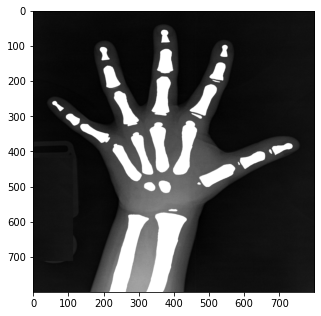

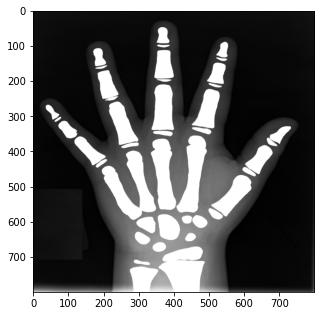

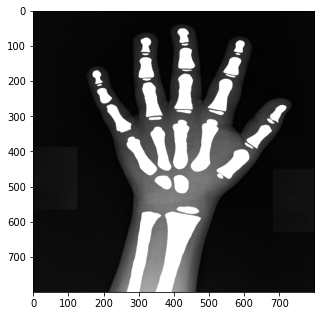

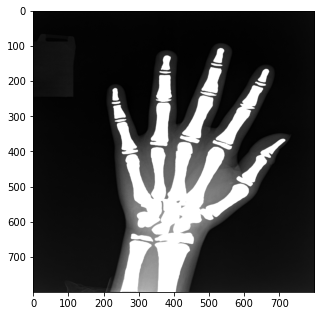

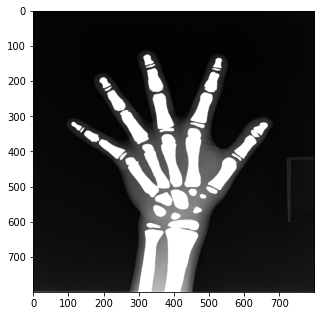

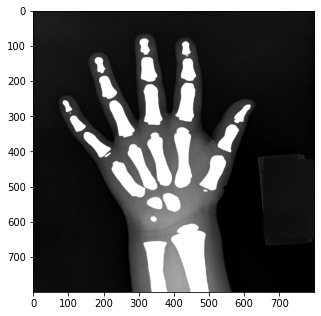

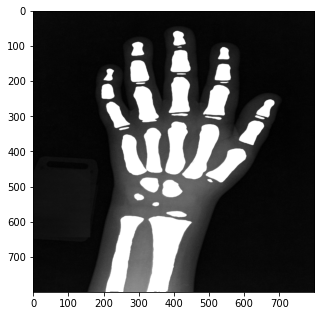

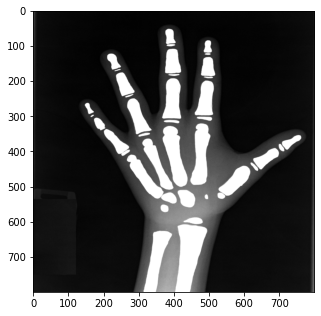

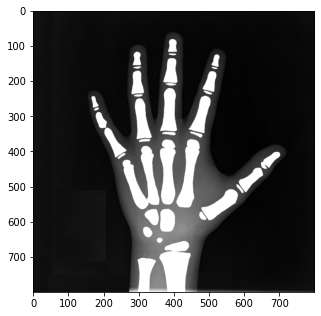

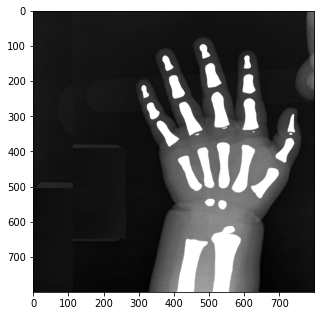

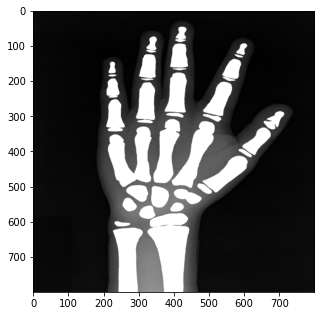

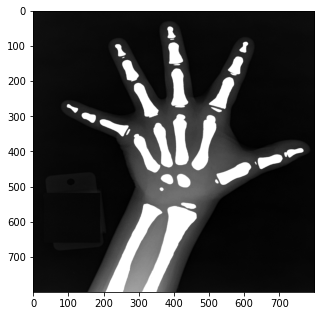

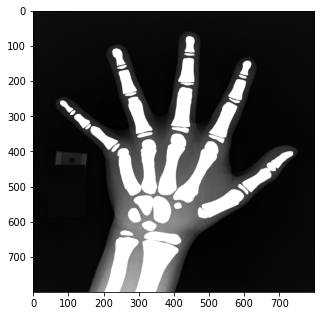

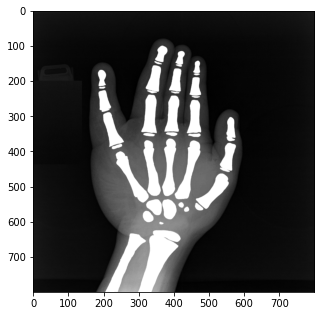

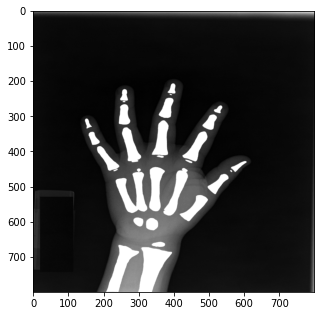

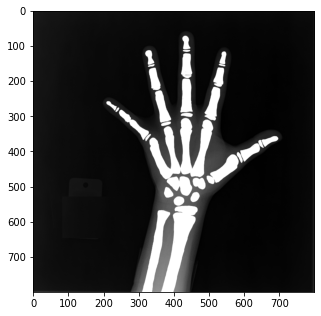

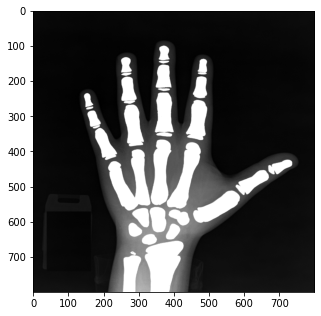

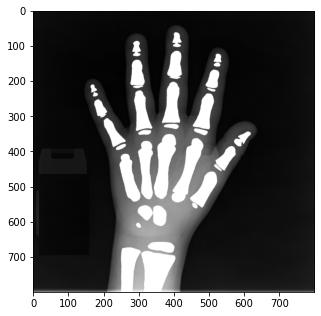

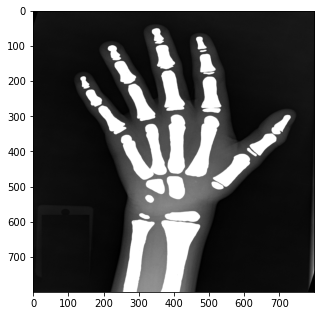

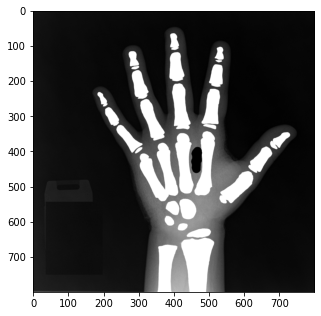

In [ ]:
# 시각화
rows = 5
cols = 4

for num, bone in enumerate(bones_box):
  num += 1
  plt.figure(figsize=(30,30))
  plt.subplot(rows, cols, num)
  plt.imshow(bone,cmap='gray')

In [ ]:
# 강도가 최고인 255만 추출하기 위한 코드, 타입 에러가 나서 float64로 바꿔야한다.
np.where(bones_box<255,'0.','255.').dtype

dtype('<U4')

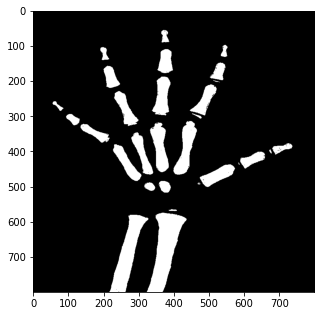

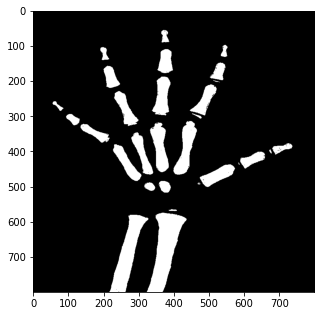

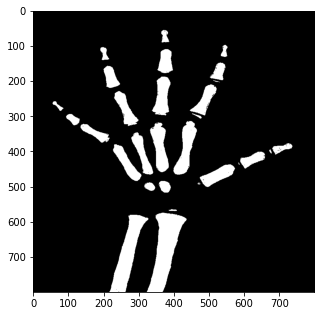

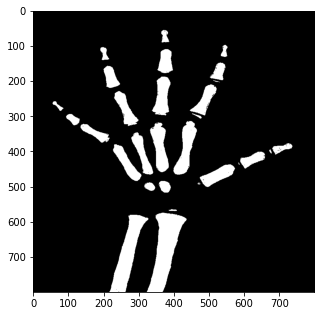

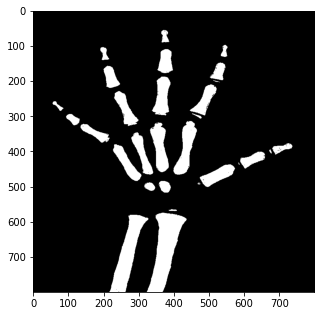

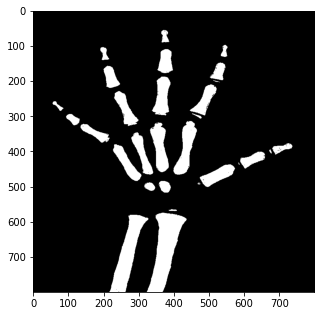

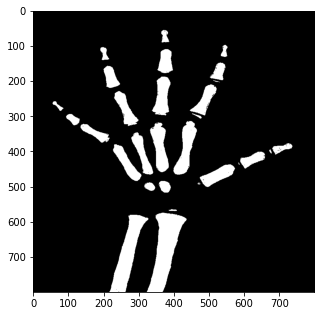

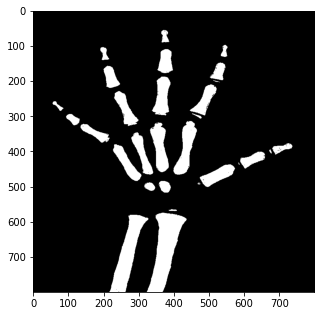

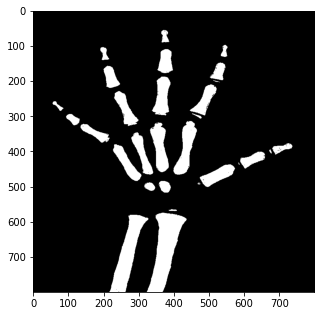

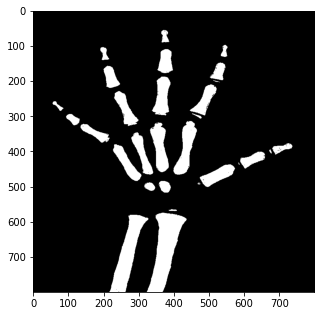

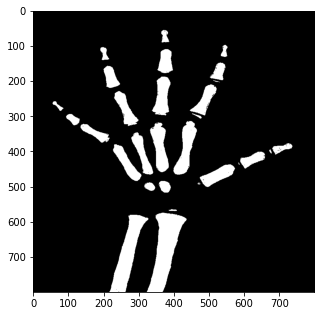

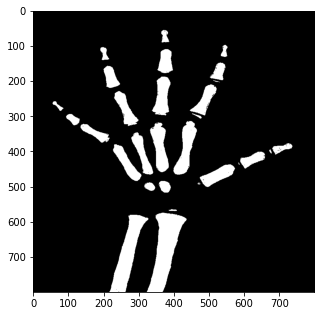

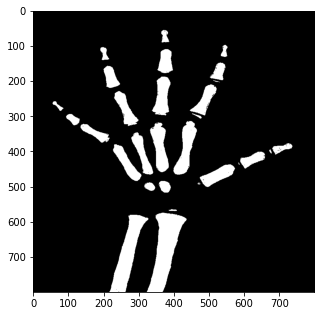

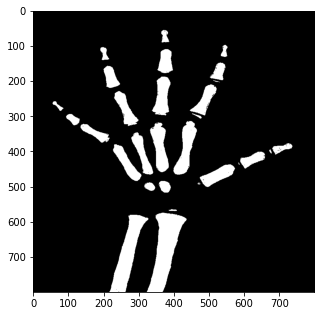

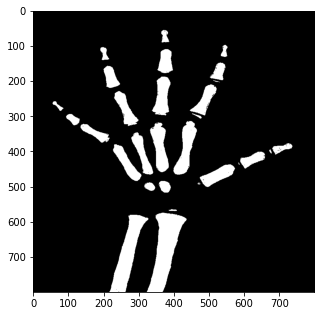

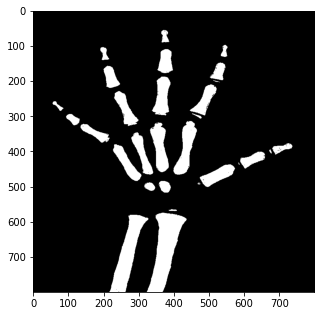

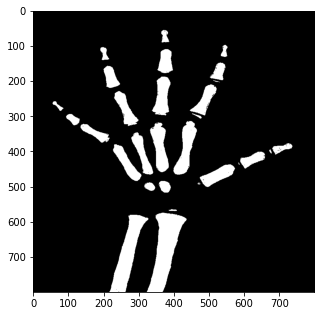

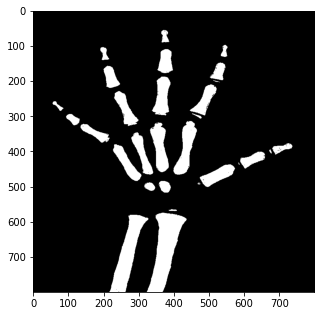

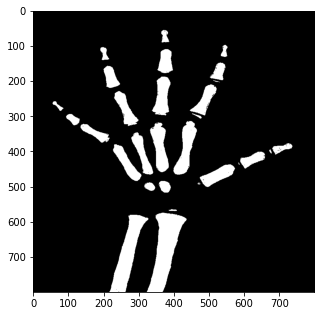

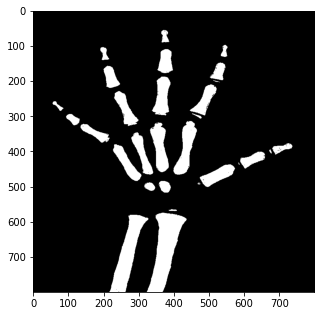

In [ ]:
ground_truths = np.where(bones_box<255,'0.','255.').astype('float64')

# 추출된 이미지를 저장할 디렉토리 
SAVE_PATH = '/content/drive/MyDrive/bone/labels'

rows = 5
cols = 4

for num, ground_truth in enumerate(ground_truths):
  # print(num)
  num += 1
  plt.figure(figsize=(30,30))
  plt.subplot(rows, cols, num)
  plt.imshow(image, cmap='gray')
  im = Image.fromarray(ground_truth)
  im.show()

  if not os.path.exists(SAVE_PATH):
            os.makedirs(SAVE_PATH)
  
  # 파일 이름 그대로 저장된다. 그레이로 저장하기!
  plt.imsave(SAVE_PATH+'/'+f'{bones[num-1][:-4]}.jpeg', im, cmap='gray')